<a href="https://colab.research.google.com/github/Bhuvana908/ML-Projects/blob/main/K-NN%20Classification%20on%20Breast%20Cancer%20Dataset/K_NN_Classification_on_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 K-NN Classification on Breast Cancer Dataset (with PCA)  

This project demonstrates the complete **Machine Learning workflow** using the **Breast Cancer dataset** from `sklearn.datasets`.  
It includes **data exploration, visualization, preprocessing, model training, hyperparameter tuning, and dimensionality reduction (PCA)**.

---

## 📊 1. Dataset Overview
- Dataset: Breast Cancer Wisconsin Diagnostic dataset (from `sklearn.datasets`)
- Features: 30 continuous attributes related to tumor characteristics
- Target:  
  - `0` → Malignant (Cancerous)  
  - `1` → Benign (Non-Cancerous)

Key steps:
1. Load the dataset  
2. View dataset shape and target class distribution  

---

## 📈 2. Data Visualization
- **Count Plot:** Shows the distribution of malignant vs benign samples.  
- **Box Plot:** Detects potential outliers across all features.  
- **Correlation Matrix:** Displays relationships between features using a heatmap.

These plots help understand the **data balance** and **feature correlations** before training the model.

---

## ⚙️ 3. Data Preprocessing
- Split dataset into **Training (80%)** and **Testing (20%)** sets.
- Standardize features using **`StandardScaler`** to normalize the data for K-NN.

---

## 🔍 4. Hyperparameter Tuning (K Selection)
- Used **5-fold cross-validation** to test `k` values from 1 to 20.
- Selected the **best `k`** value based on the highest average accuracy.

---

## 🧩 5. Model Training & Evaluation (Before PCA)
- Trained `KNeighborsClassifier` using the best `k`.
- Evaluated model using:
  - **Accuracy Score**
  - **Classification Report**
  - **Confusion Matrix**

The results show the classifier’s performance in predicting tumor types using all 30 original features.

---

## 🔻 6. Dimensionality Reduction using PCA
- Applied **Principal Component Analysis (PCA)** to reduce features while retaining **95% variance**.  
- Visualized the explained variance ratio to determine how many components to keep.  
- Reduced dataset to **2 dimensions** for visualization.

---

## ⚖️ 7. Model Training & Evaluation (After PCA)
- Re-trained the **K-NN model** using the reduced 2D data.
- Compared accuracy, classification metrics, and confusion matrices **before and after PCA**.

---

## 🌈 8. Visualization of PCA Results
- **2D PCA Scatter Plot:** Displays how data points (malignant vs benign) separate in the PCA space.  
- **Decision Boundary Plot:** Shows how K-NN classifies points in the 2D space, highlighting model performance visually.

---

## 🧾 9. Key Takeaways
✅ PCA helps visualize and simplify high-dimensional data.  
✅ Accuracy remains competitive after dimensionality reduction.  
✅ Cross-validation ensures the best hyperparameter (`k`) is selected.  
✅ The combination of **Seaborn**, **Matplotlib**, and **Scikit-learn** creates a strong analysis pipeline.

---

**Libraries Used:**  
`numpy`, `pandas`, `matplotlib`, `seaborn`, `sklearn`  

This project highlights the importance of **data visualization**, **feature scaling**, **dimensionality reduction**, and **model evaluation** in building interpretable and optimized ML models.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target classes:", y.value_counts())

Dataset shape: (569, 30)
Target classes: 1    357
0    212
Name: count, dtype: int64


/tmp/ipython-input-3132390671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


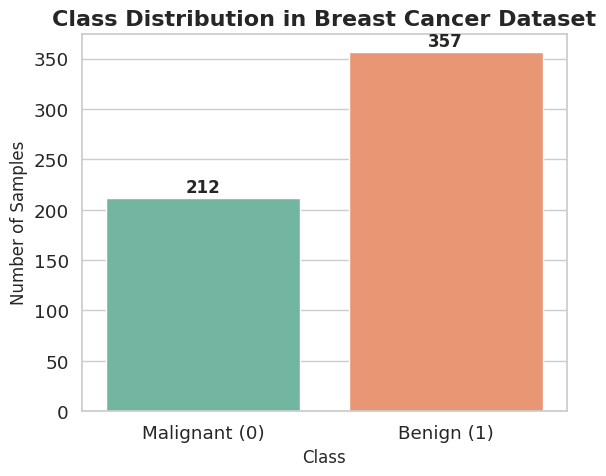

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


plt.figure(figsize=(6,5))
sns.countplot(x=y, palette="Set2")
plt.xticks([0,1], ['Malignant (0)', 'Benign (1)'])
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Class Distribution in Breast Cancer Dataset', fontsize=16, weight='bold')
for i, count in enumerate(y.value_counts().sort_index()):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


The dataset consists of a total of 569 samples, out of which 212 are malignant and 357 are benign.

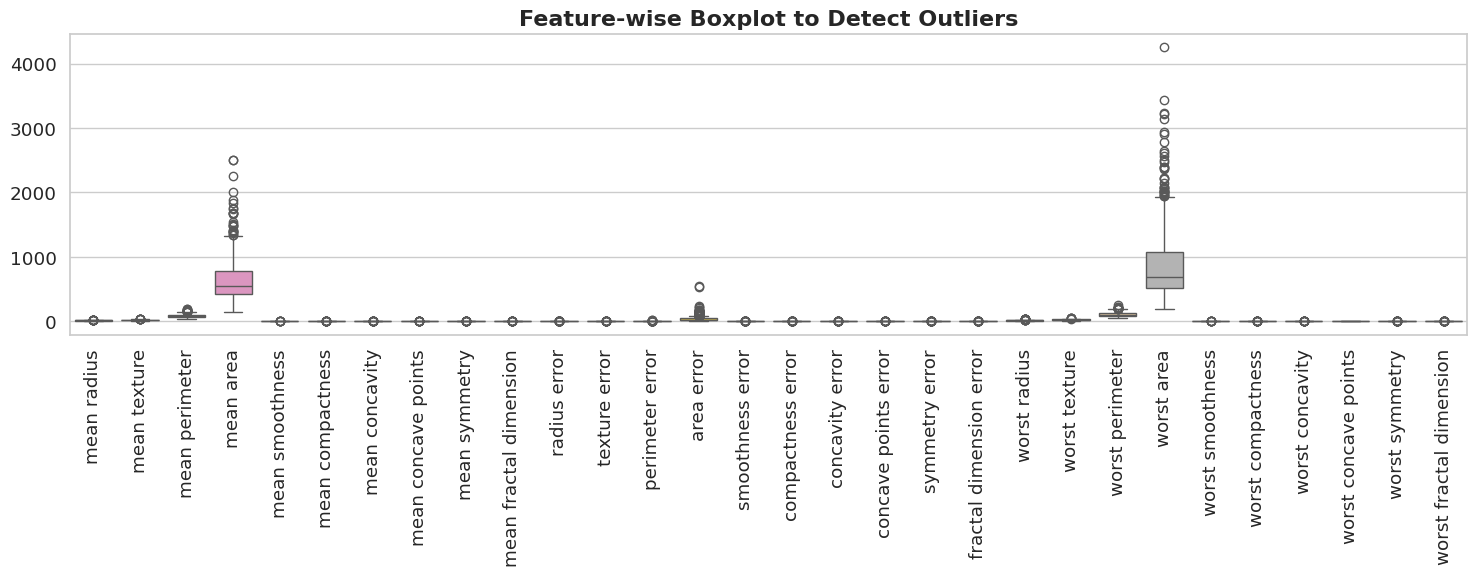

In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


plt.figure(figsize=(15,6))
sns.boxplot(data=X, palette="Set2")
plt.xticks(rotation=90)
plt.title("Feature-wise Boxplot to Detect Outliers", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

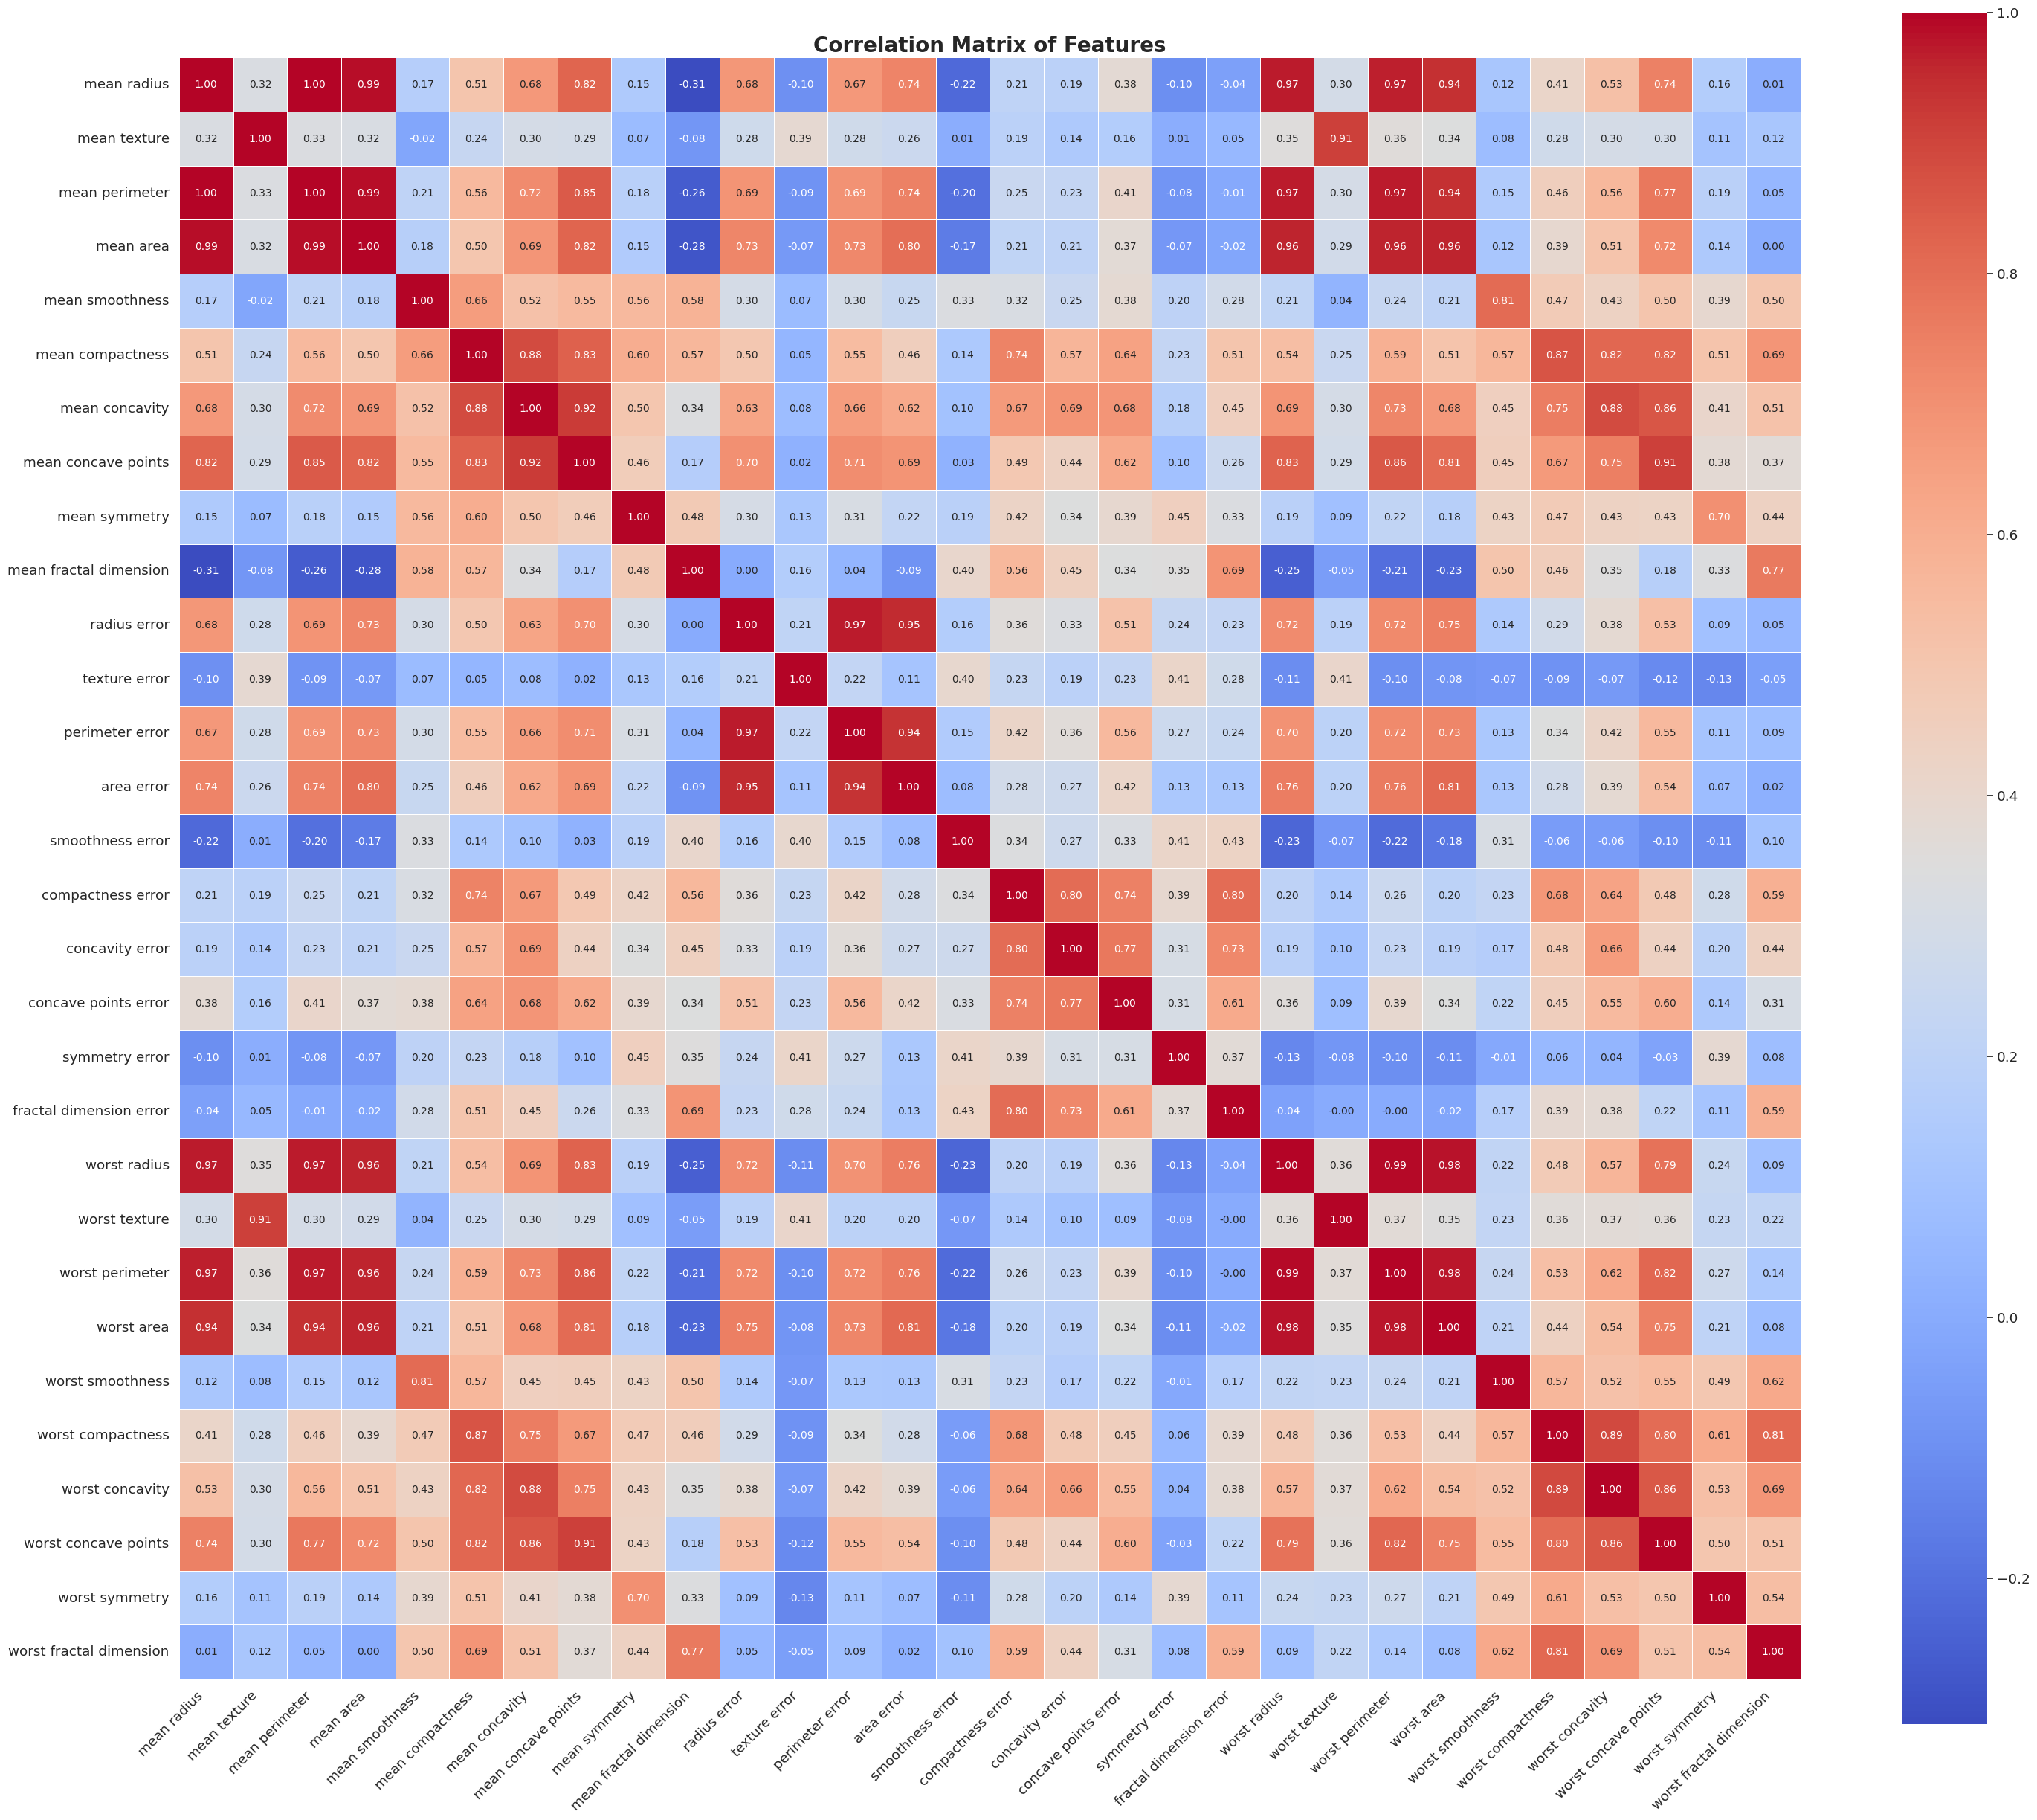

In [ ]:
plt.figure(figsize=(30,25))
sns.heatmap(
    X.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    annot_kws={"size":10}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Features", fontsize=20, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

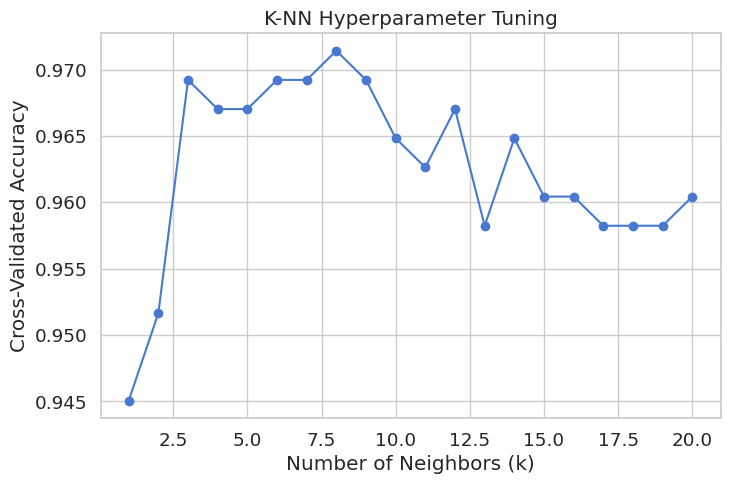

Best k: 8


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-NN Hyperparameter Tuning')
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)

The graph shows that the model’s accuracy increases as the number of neighbors (k) rises, reaching its peak at k = 8. Beyond this point, accuracy slightly fluctuates and tends to decrease. Therefore, k = 8 is identified as the optimal value, providing the best balance between bias and variance for the K-NN model.

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



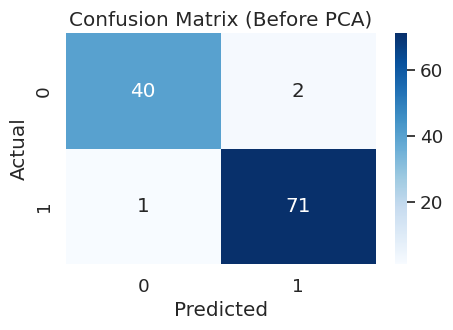

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Before PCA)')
plt.show()


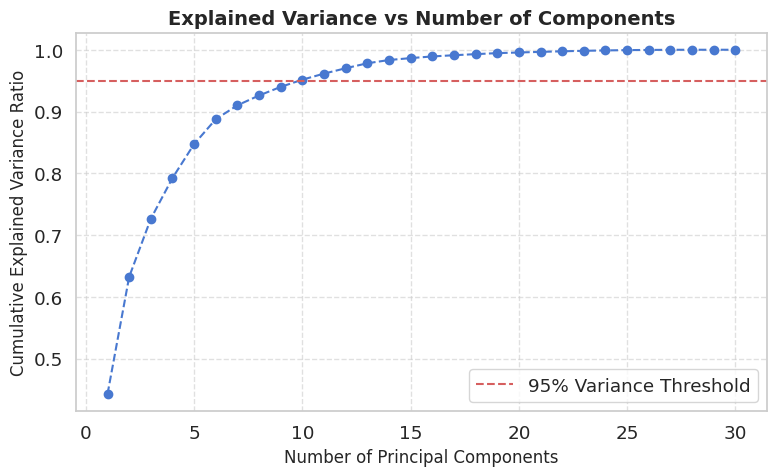

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca_full = PCA()
pca_full.fit(X_scaled)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--', color='b')
plt.title('Explained Variance vs Number of Components', fontsize=14, weight='bold')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()

The graph shows that the cumulative explained variance increases rapidly with the first few principal components and starts to level off after around 10 components. About 9–10 components capture 95% of the total variance, as indicated by the red dashed line. This suggests that the dataset’s dimensionality can be effectively reduced to around 10 components with minimal information loss.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.44413492 0.18944618]


Accuracy after PCA: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



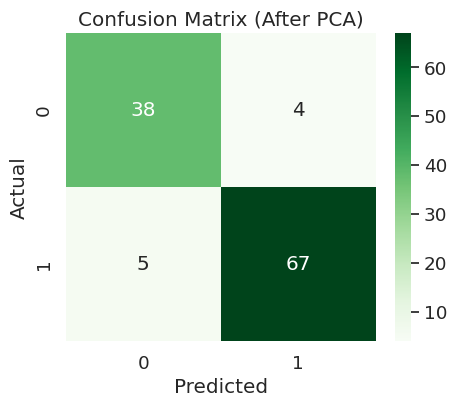

In [22]:
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

print("Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After PCA)')
plt.show()


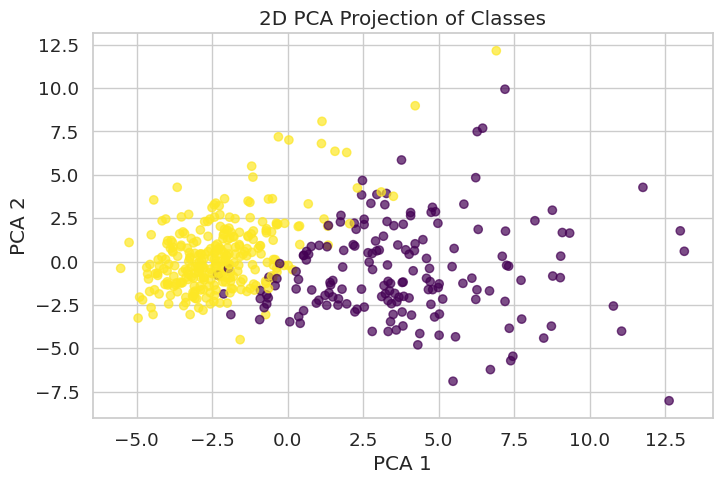

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D PCA Projection of Classes')
plt.show()


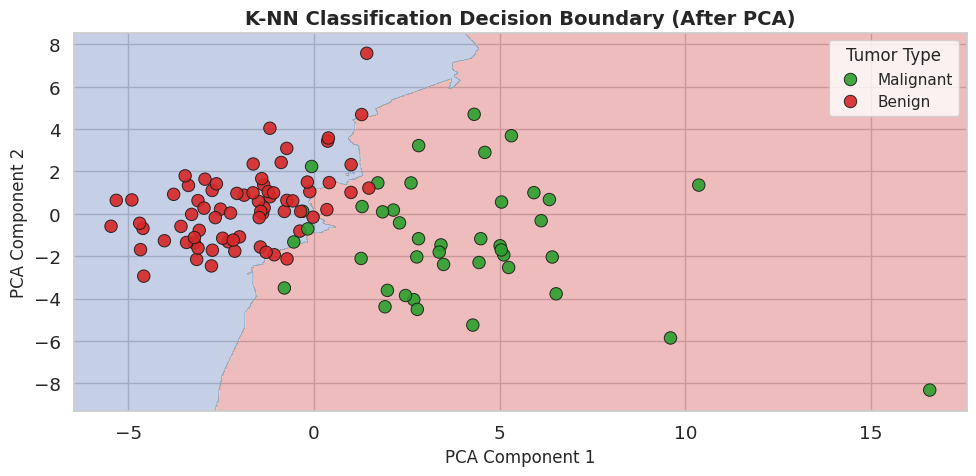

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_decision_boundary(model, X, y, title="Decision Boundary"):

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    label_map = {0: 'Malignant', 1: 'Benign'}
    y_named = np.vectorize(label_map.get)(y)


    plt.figure(figsize=(10,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)


    sns.scatterplot(
        x=X[:,0], y=X[:,1],
        hue=y_named,
        palette={'Malignant': '#2ca02c', 'Benign': '#d62728'},
        s=80, edgecolor='k', alpha=0.9
    )

    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.title(title, fontsize=14, weight='bold')
    plt.legend(title='Tumor Type', fontsize=11, title_fontsize=12)
    plt.tight_layout()
    plt.show()


plot_decision_boundary(knn_pca, X_test_pca, y_test, title="K-NN Classification Decision Boundary (After PCA)")


The K-NN decision boundary after PCA clearly separates most malignant (green) and benign (red) samples. The malignant tumors are mainly clustered on the right side, while benign ones dominate the left region. A few samples near the boundary are misclassified, indicating some overlap between the two classes, but overall, the classifier achieves good separation.